# BITLY.COM/CHURN-DATA-DQLAB
# bitly.com/churn-data-dqlab


In [24]:
import pandas as pd
import numpy as np

import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telcom = pd.read_excel("Telco Churn Data.xlsx")
telcom.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,113,28.34,122,12.61,121,8.41,3,2.73


In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nMissing values : ", telcom.isnull().sum().values.sum())
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nData Types :  \n", telcom.dtypes)
print ("\nUnique values :  \n", telcom.nunique())


Rows     :  3333
Columns  :  17

Missing values :  0

Features : 
 ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Churn', "Int'l Plan", 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge']

Data Types :  
 Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
dtype: object

Unique values :  
 Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan    

In [4]:
# List similar columns
charge_cols = [col for col in telcom.columns if 'Charge' in col]
calls_cols  = [col for col in telcom.columns if ('Calls' in col) & ('CustServ' not in col)]
mins_cols   = [col for col in telcom.columns if 'Mins' in col]

In [5]:
# Aggregate similar columns
telcom['Total Charge'] = telcom[charge_cols].sum(axis = 1)
telcom['Total Calls']  = telcom[calls_cols].sum(axis = 1)
telcom['Total Mins']   = telcom[mins_cols].sum(axis = 1)

In [6]:
#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == 1]
not_churn = telcom[telcom["Churn"] == 0]

## Data Exploration

In [7]:
# Num of Churn vs Not Churn
telcom['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [8]:
telcom.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Total Charge', 'Total Calls',
       'Total Mins'],
      dtype='object')

In [9]:
sns.set_palette("muted")
def plot_distribution(feature, split = True):
    if split:
        sns.distplot(churn[feature], kde = False, label= 'Churn',
                     color = 'blue',
                     bins = 20
                    )
        sns.distplot(not_churn[feature], kde = False, label= 'Not Churn', 
                     bins = 20
                    )
        plt.legend()
    else:
        sns.distplot(telcom[feature], kde = False, 
                     bins = 20
                     
                    )

    
    plt.title(feature + " Distribution")
    plt.show()

def plot_pair_relation(features):
    sns.pairplot(telcom, hue = 'Churn', vars = features, 
                 kind = 'reg',
                 plot_kws={'scatter_kws': {'alpha': 0.3}})
    plt.show()
    

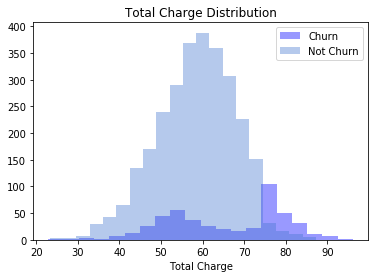

In [10]:
plot_distribution('Total Charge', split = True)

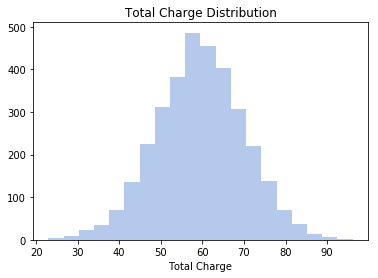

In [11]:
plot_distribution('Total Charge', split = False)

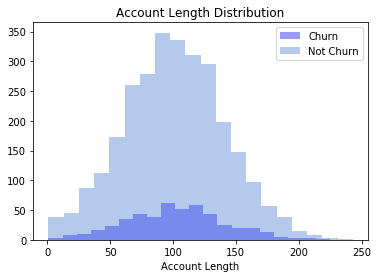

In [12]:
plot_distribution('Account Length', split = True)

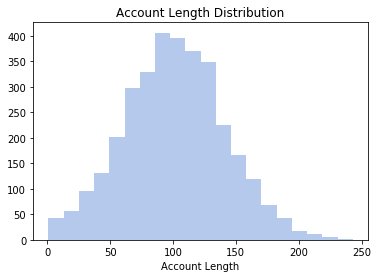

In [13]:
plot_distribution('Account Length', split = False)

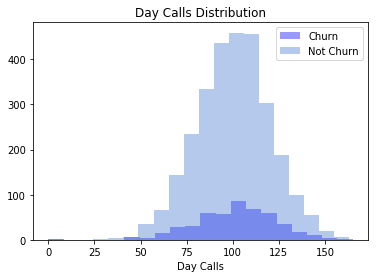

In [23]:
plot_distribution('Day Calls', split = True)

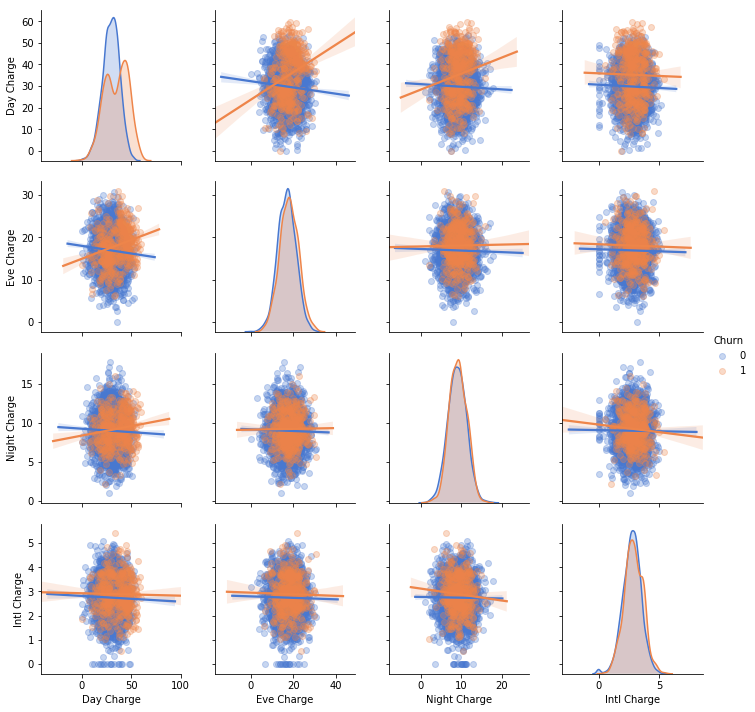

In [14]:
plot_pair_relation(charge_cols)

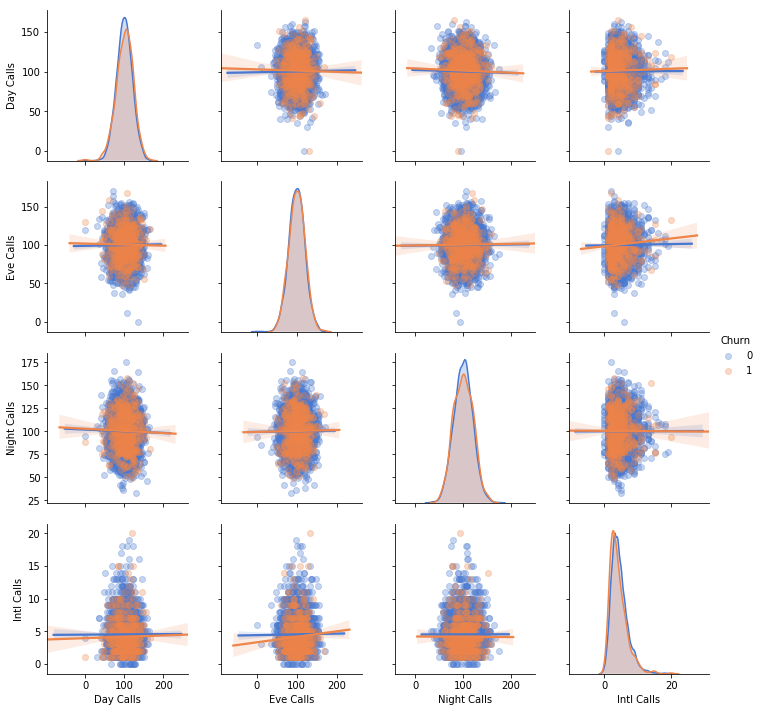

In [15]:
plot_pair_relation(calls_cols)

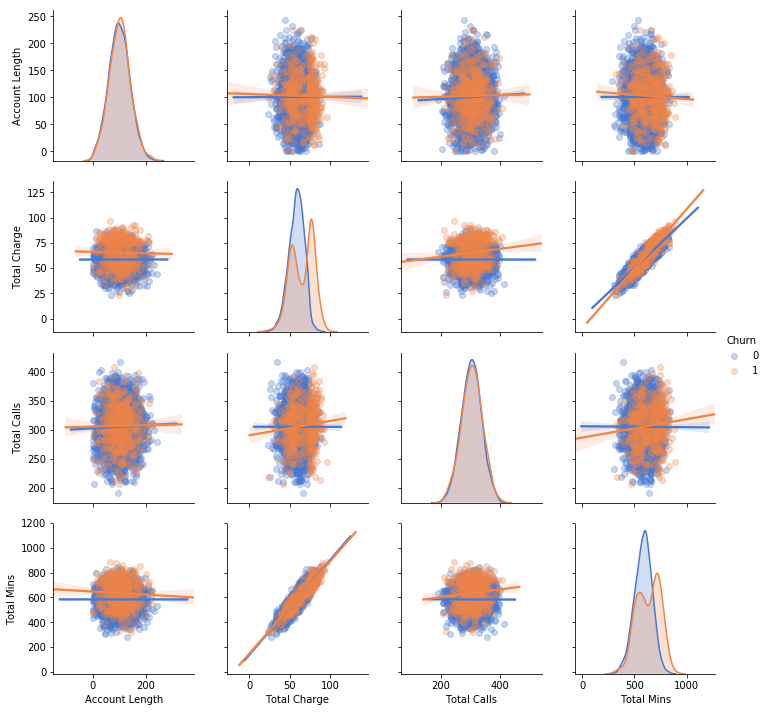

In [16]:
plot_pair_relation(['Account Length','Total Charge', 'Total Calls','Total Mins'])

#### Note: #calls unrelated to #minutes

#### Note: User with intl plan is more likely to churn

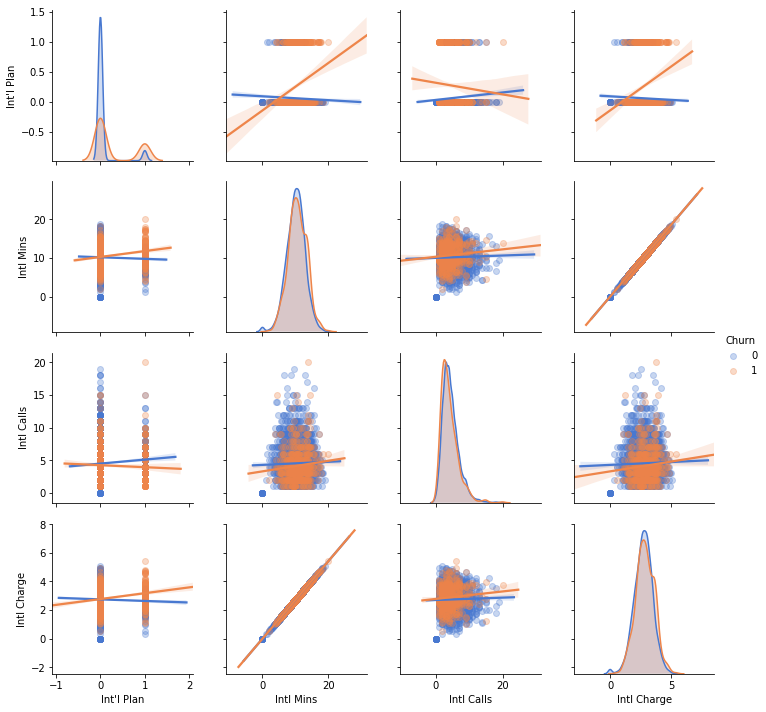

In [17]:
plot_pair_relation(["Int'l Plan", 'Intl Mins', 'Intl Calls', 'Intl Charge'])

# PCA 

In [18]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components = n_components)
target_col = ["Churn"]
X = telcom[[i for i in telcom.columns if i not in target_col ]]
Y = telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ['PC' + str(i + 1) for i in range(n_components)])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

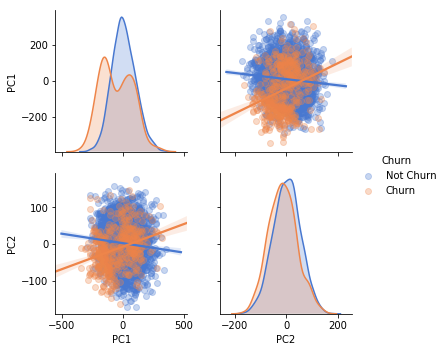

In [19]:
sns.pairplot(pca_data, hue = 'Churn',
             kind = 'reg',
             plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()